In [ ]:
#1
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

jab = pd.read_csv('data_set.csv')
jab.columns = ['구id', '구성별','구나이','3개월간구매횟수','평균금액','찜시각','카테고리','상품가격','찜수','택포','교환','판성별','판나이','구매여부']


buser=pd.read_csv('output_8.csv',header=None)
f=pd.DataFrame(buser)
f=f.transpose()
f.columns =['buserid'] 


In [ ]:
#2  기간내 구매(번프, 번페)를 2번 이상 한 사람 uid만 남겨서 그 사람들 데이터로만 학습. #######
#->구매여부=1 증가시키기 위해
#나머지는 동일하게 하고 1번이상한사람 대상으로 해서 비교해볼것
#현재는 output_4,smote,Robust scaler, random forest의 조합이 가장 좋음#######################################
f

,buserid
0,719
1,1200
2,1985
3,6192
4,6881
...,...
4726,74508159
4727,74508238
4728,74512454
4729,74515817


In [ ]:
jab['나이차이'] = abs(jab['구나이'] - jab['판나이'])
jab.shape

(799303, 15)

In [ ]:
jab=jab[jab['구id'].isin (f['buserid'])]
jab.head(60)

,구id,구성별,구나이,3개월간구매횟수,평균금액,찜시각,카테고리,상품가격,찜수,택포,교환,판성별,판나이,구매여부,나이차이
13,719,2,20,18,35012,20201127,700100,15000,1,0,0,2,20,0,0
14,719,2,20,18,35012,20201204,400020,25000,5,0,0,2,25,0,5
15,719,2,20,18,35012,20201204,700100,55000,3,0,0,2,10,0,10
16,719,2,20,18,35012,20201204,700100,45000,13,1,0,2,10,0,10
17,719,2,20,18,35012,20201128,320080,33000,1,0,0,1,20,1,0
18,719,2,20,18,35012,20201204,700100,90000,1,0,0,2,10,0,10
19,719,2,20,18,35012,20201204,700100,100000,2,0,0,2,35,0,15
20,719,2,20,18,35012,20201204,600700,350000,3,0,0,2,20,0,0
21,719,2,20,18,35012,20201204,600700,550000,10,0,0,2,20,0,0
22,719,2,20,18,35012,20201128,320150,25000,13,1,0,2,10,0,10


In [ ]:
jab.shape

(144323, 15)

In [ ]:
# jab['구매여부'].hist()
print(jab['구매여부'].value_counts())

0    131830
1     12493
Name: 구매여부, dtype: int64


(array([1.2264e+05, 1.4148e+04, 5.3620e+03, 1.2080e+03, 1.4300e+02,
        1.1800e+02, 3.5000e+01, 6.3100e+02, 0.0000e+00, 2.0000e+01]),
 array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360., 405., 450.]),
 <a list of 10 Patch objects>)

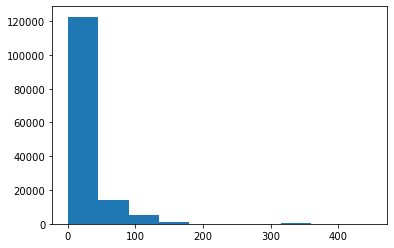

In [ ]:
plt.hist(jab['3개월간구매횟수'],range=(0,450),bins=10)

(array([18712., 37474., 23534., 17103.,  9964.,  7243.,  5889.,  4407.,
         3099.,  1828.,  1648.,   934.,  1811.,   829.,  1743.,   943.,
          571.,   655.,   380.,   534.]),
 array([     0.,  15000.,  30000.,  45000.,  60000.,  75000.,  90000.,
        105000., 120000., 135000., 150000., 165000., 180000., 195000.,
        210000., 225000., 240000., 255000., 270000., 285000., 300000.]),
 <a list of 20 Patch objects>)

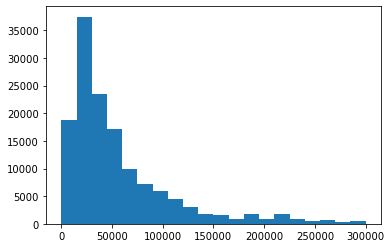

In [ ]:
plt.hist(jab['평균금액'],range=(0,300000),bins=20)

(array([37096., 29935., 19330., 11191.,  7527.,  5356.,  5067.,  2064.,
         3248.,  2069.,  2967.,  1362.,  1649.,  1636.,   966.,   729.,
         1345.,   501.,   804.,  1231.]),
 array([     0.,  15000.,  30000.,  45000.,  60000.,  75000.,  90000.,
        105000., 120000., 135000., 150000., 165000., 180000., 195000.,
        210000., 225000., 240000., 255000., 270000., 285000., 300000.]),
 <a list of 20 Patch objects>)

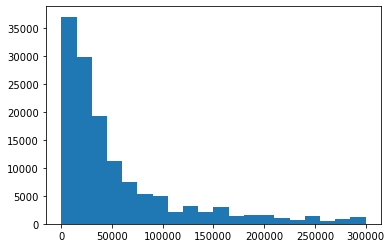

In [ ]:
plt.hist(jab['상품가격'],range=(0,300000),bins=20)

(array([1.08555e+05, 1.89750e+04, 6.56400e+03, 2.71000e+03, 1.65300e+03,
        9.04000e+02, 7.02000e+02, 5.34000e+02, 4.49000e+02, 3.03000e+02,
        2.46000e+02, 2.02000e+02, 2.04000e+02, 1.35000e+02, 1.39000e+02,
        1.23000e+02, 1.00000e+02, 9.20000e+01, 9.20000e+01, 9.00000e+01]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
        112.5, 125. , 137.5, 150. , 162.5, 175. , 187.5, 200. , 212.5,
        225. , 237.5, 250. ]),
 <a list of 20 Patch objects>)

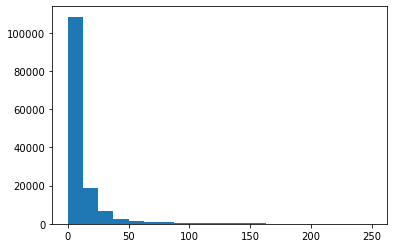

In [ ]:
plt.hist(jab['찜수'],range=(0,250),bins=20)

(array([9.7693e+04, 2.4711e+04, 8.4010e+03, 3.8960e+03, 2.1030e+03,
        1.3240e+03, 9.1700e+02, 6.2300e+02, 4.7800e+02, 4.5100e+02,
        3.6400e+02, 2.7600e+02, 2.0100e+02, 2.0400e+02, 1.5500e+02,
        1.5600e+02, 1.2700e+02, 1.1200e+02, 9.5000e+01, 1.2100e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <a list of 20 Patch objects>)

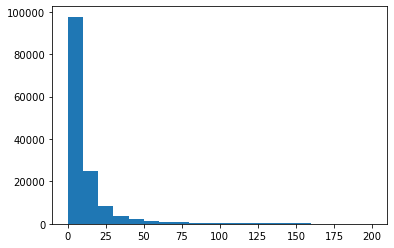

In [ ]:
plt.hist(jab['찜수'],range=(0,200),bins=20)

(array([3.6629e+04, 3.1814e+04, 3.6981e+04, 1.7023e+04, 1.4140e+04,
        1.8150e+03, 4.7590e+03, 1.7000e+02, 7.0000e+02, 7.9000e+01,
        1.8500e+02, 2.8000e+01]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <a list of 12 Patch objects>)

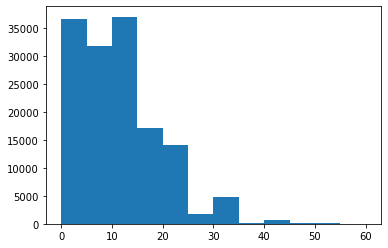

In [ ]:
plt.hist(jab['나이차이'],range=(0,60),bins=12)

C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52252 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jiwon Pyo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 

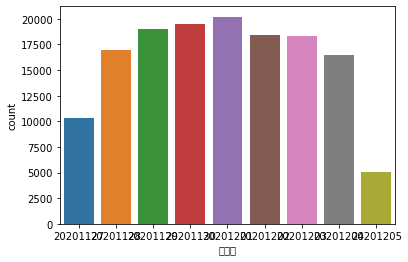

In [ ]:
sns.countplot(jab['찜시각'])
plt.show()

In [ ]:
# sns.countplot(jab['카테고리'])
# plt.show()
print(jab['카테고리'].value_counts())

400010    8703
320080    7709
400040    6692
310120    5924
310090    5467
          ... 
210218       1
220070       1
240050       1
220100       1
210211       1
Name: 카테고리, Length: 148, dtype: int64


In [ ]:
#범주형 변수 One Hot Encoding
jab['구id'] = jab['구id'].astype(str)
jab['구성별'] = jab['구성별'].astype(str)
jab['카테고리'] = jab['카테고리'].astype(str)
jab['찜시각'] = jab['찜시각'].astype(str)
jab['택포'] = jab['택포'].astype(str)
jab['교환'] = jab['교환'].astype(str)
jab['판성별'] = jab['판성별'].astype(str)


jab_new=pd.get_dummies(jab, columns=['구id','구성별','찜시각','카테고리','택포','교환','판성별'])

In [ ]:
#3. preparing dataset 
features = jab[['구id', '구성별','3개월간구매횟수','평균금액','찜시각','카테고리','상품가격','찜수','택포','교환','판성별','나이차이']]
purchase =jab['구매여부']

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, purchase)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(train_features,train_labels)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_features.shape, train_labels.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (108242, 12) (108242,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (197666, 12) (197666,)
SMOTE 적용 후 레이블 값 분포: 
 1    98833
0    98833
Name: 구매여부, dtype: int64


In [ ]:
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=98878 (50.000%)
Class=1, n=98878 (50.000%)


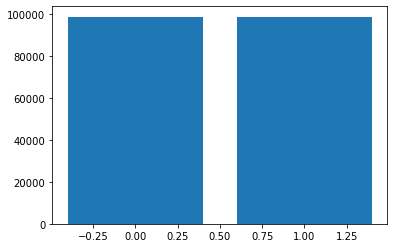

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_over,y_train_over = SMOTE(random_state=0).fit_resample(train_features,train_labels)
count_and_plot(y_train_over)

In [ ]:
from imblearn.over_sampling import ADASYN
X_train_over,y_train_over = ADASYN(random_state=0).fit_sample(train_features,train_labels)
print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', train_features.shape, train_labels.shape)
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('ADASYN 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ADASYN 적용 전 학습용 피처/레이블 데이터 세트:  (108515, 13) (108515,)
ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (197335, 13) (197335,)
ADASYN 적용 후 레이블 값 분포: 
 0    99024
1    98311
Name: 구매여부, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_over = scaler.fit_transform(X_train_over)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


X_train_over = scaler.fit_transform(X_train_over)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


X_train_over = scaler.fit_transform(X_train_over)
test_features = scaler.transform(test_features)



In [ ]:
#generating a model, evaluation
#Logistic
from sklearn.linear_model import LogisticRegression


model= LogisticRegression(max_iter=700)
model.fit(X_train_over,y_train_over)

LogisticRegression(max_iter=700)

In [ ]:
#Decision Tree

from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = "entropy") # 종속변수가 현재 범주형
model = model.fit(X_train_over, y_train_over)   

In [ ]:
#xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 2)
model.fit(X_train_over, y_train_over)
w_preds = model.predict(test_features)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
y_pred=model.predict(test_features)
def get_jab_eval(test_labels,y_pred):
    confusion = confusion_matrix(test_labels, y_pred)
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred)
    recall = recall_score(test_labels, y_pred)
    F1 = f1_score(test_labels, y_pred)
    AUC = roc_auc_score(test_labels, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

get_jab_eval(test_labels, w_preds)

오차행렬:
 [[32913    39]
 [ 3108    21]]

정확도: 0.9128
정밀도: 0.3500
재현율: 0.0067
F1: 0.0132
AUC: 0.5028


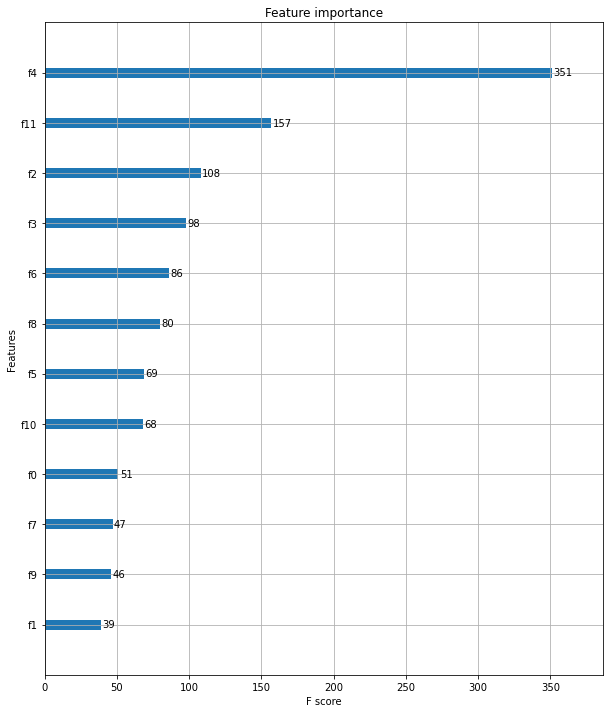

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)

# f0:'구id' f1:'구성별' f2:'3개월간구매횟수' f3: '평균금액' f4:'찜시각'
# f5:'카테고리'f6:'상품가격'f7:'찜수' f8:'택포'f9:'교환'
# f10:'판성별' f11: '나이차이'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=400,     # Number of trees
                              max_features=2,     # Num features considered
                              oob_score=True)
model

RandomForestClassifier(max_features=2, n_estimators=400, oob_score=True)

In [ ]:
model.fit(X_train_over, y_train_over)
#Test data를 입력해 target data를 예측 (매번 달라짐)
prediction = model.predict(test_features)
#예측 결과 precision과 실제 test data의 target을 비교
print(prediction==test_labels)

266975    True
121118    True
129685    True
488251    True
105411    True
          ... 
788517    True
494706    True
543527    True
783052    True
594033    True
Name: 구매여부, Length: 36081, dtype: bool


In [ ]:
print(model.score(X_train_over, y_train_over))

0.9995345684133842


In [ ]:
print(model.score(test_features, test_labels))

0.9220919597572129


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,model.predict(test_features)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     32997
           1       0.65      0.19      0.29      3084

    accuracy                           0.92     36081
   macro avg       0.79      0.59      0.63     36081
weighted avg       0.91      0.92      0.90     36081



In [ ]:
# 12490247
# 8152165
# 74398604
# 14769
# 11973942
# 7903468
# 1912936
# 74449629
# 4061981
# 7725692
# 7354268
# 8510660
# f0:'구id' f1:'구성별' f2:'3개월간구매횟수' f3: '평균금액' f4:'찜시각'
# f5:'카테고리'f6:'상품가격'f7:'찜수' f8:'택포'f9:'교환'
# f10:'판매자후기수' f11:'판성별' f12: 'agediff'

import numpy as np
a=np.array([12490247,0,0,0,20201127,600100,260000,17,0,0,1,20])
b=np.array([8152165,2,0,0,20201129,600100,260000,17,0,0,1,0])
c=np.array([74398604,0,0,0,20201203,600100,260000,17,0,0,1,20])
d=np.array([14769,2,12,59190,20201128,600100,260000,17,0,0,1,0])
e=np.array([11973942,1,0,0,20201204,600100,260000,17,0,0,1,0])
f=np.array([7903468,2,7,178601,20201129,600100,260000,17,0,0,1,10])
g=np.array([1912936,2,0,0,20201129,600100,260000,17,0,0,1,10])
h=np.array([74449629,0,0,0,20201130,600100,260000,17,0,0,1,20])
i=np.array([4061981,2,0,0,20201129,600100,260000,17,0,0,1,5])
j=np.array([7725692,2,7,49721,20201201,600100,260000,17,0,0,1,5])
k=np.array([7354268,2,0,0,20201130,600100,260000,17,0,0,1,0])
l=np.array([8510660,2,0,0,20201127,600100,260000,17,0,0,1,0])



sample = np.array([a,b,c,d,e,f,g,h,i,j,k,l])

In [ ]:
sample = scaler.transform(sample)

In [ ]:
print(model.predict_proba(sample))

[[0.9555091  0.04449087]
 [0.91025895 0.08974105]
 [0.9581735  0.04182651]
 [0.87492526 0.12507476]
 [0.9451831  0.05481689]
 [0.8196083  0.18039174]
 [0.9226051  0.07739493]
 [0.95140564 0.04859434]
 [0.92409515 0.07590488]
 [0.9029761  0.09702391]
 [0.9111831  0.0888169 ]
 [0.9131369  0.08686312]]


In [ ]:
print(model.predict(sample))

[0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
sample = scaler.transform(sample)